In [86]:
import pandas as pd
import pickle
import networkx as nx
import matplotlib.pyplot as plt

data = pd.read_csv('Groceries_dataset.csv')
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [87]:
# data understanding
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [88]:
data.tail()

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [89]:
data.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [91]:
data.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [92]:
# data preparation
transaction = data.groupby('Member_number')['itemDescription'].apply(list).reset_index()
transaction

,Member_number,itemDescription
0,1000,"[soda, canned beer, sausage, sausage, whole mi..."
1,1001,"[frankfurter, frankfurter, beef, sausage, whol..."
2,1002,"[tropical fruit, butter milk, butter, frozen v..."
3,1003,"[sausage, root vegetables, rolls/buns, deterge..."
4,1004,"[other vegetables, pip fruit, root vegetables,..."
...,...,...
3893,4996,"[dessert, salty snack, rolls/buns, misc. bever..."
3894,4997,"[tropical fruit, white wine, whole milk, curd,..."
3895,4998,"[rolls/buns, curd]"
3896,4999,"[bottled water, butter milk, tropical fruit, b..."


In [93]:
item_lists = transaction['itemDescription'].tolist()
filtered_transactions = [t for t in item_lists if len(t) > 1]

In [94]:
# modeling

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(filtered_transactions).transform(filtered_transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.119548,(beef)
1,0.158799,(bottled beer)
2,0.213699,(bottled water)
3,0.135967,(brown bread)
4,0.126475,(butter)
5,0.165213,(canned beer)
6,0.100564,(chicken)
7,0.185480,(citrus fruit)
8,0.114931,(coffee)
9,0.120831,(curd)


In [95]:
# evaluasi model

num_itemsets = len(frequent_itemsets)
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric='support', min_threshold=0.1)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,1.0,0.014452,1.142615,0.163569,0.200825,0.124815,0.385526
1,(whole milk),(bottled water),0.458184,0.213699,0.112365,0.245241,1.147597,1.0,0.014452,1.041790,0.237376,0.200825,0.040114,0.385526
2,(rolls/buns),(other vegetables),0.349666,0.376603,0.146742,0.419663,1.114335,1.0,0.015056,1.074197,0.157772,0.253209,0.069072,0.404654
3,(other vegetables),(rolls/buns),0.376603,0.349666,0.146742,0.389646,1.114335,1.0,0.015056,1.065502,0.164589,0.253209,0.061475,0.404654
4,(soda),(other vegetables),0.313494,0.376603,0.124166,0.396072,1.051695,1.0,0.006103,1.032237,0.071601,0.219402,0.031230,0.362886
5,(other vegetables),(soda),0.376603,0.313494,0.124166,0.329700,1.051695,1.0,0.006103,1.024178,0.078849,0.219402,0.023607,0.362886
6,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,1.0,0.018827,1.070564,0.181562,0.297448,0.065913,0.462934
7,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,1.0,0.018827,1.101643,0.157802,0.297448,0.092265,0.462934
8,(other vegetables),(yogurt),0.376603,0.282966,0.120318,0.319482,1.129050,1.0,0.013752,1.053660,0.183350,0.223121,0.050927,0.372343
9,(yogurt),(other vegetables),0.282966,0.376603,0.120318,0.425204,1.129050,1.0,0.013752,1.084553,0.159406,0.223121,0.077961,0.372343


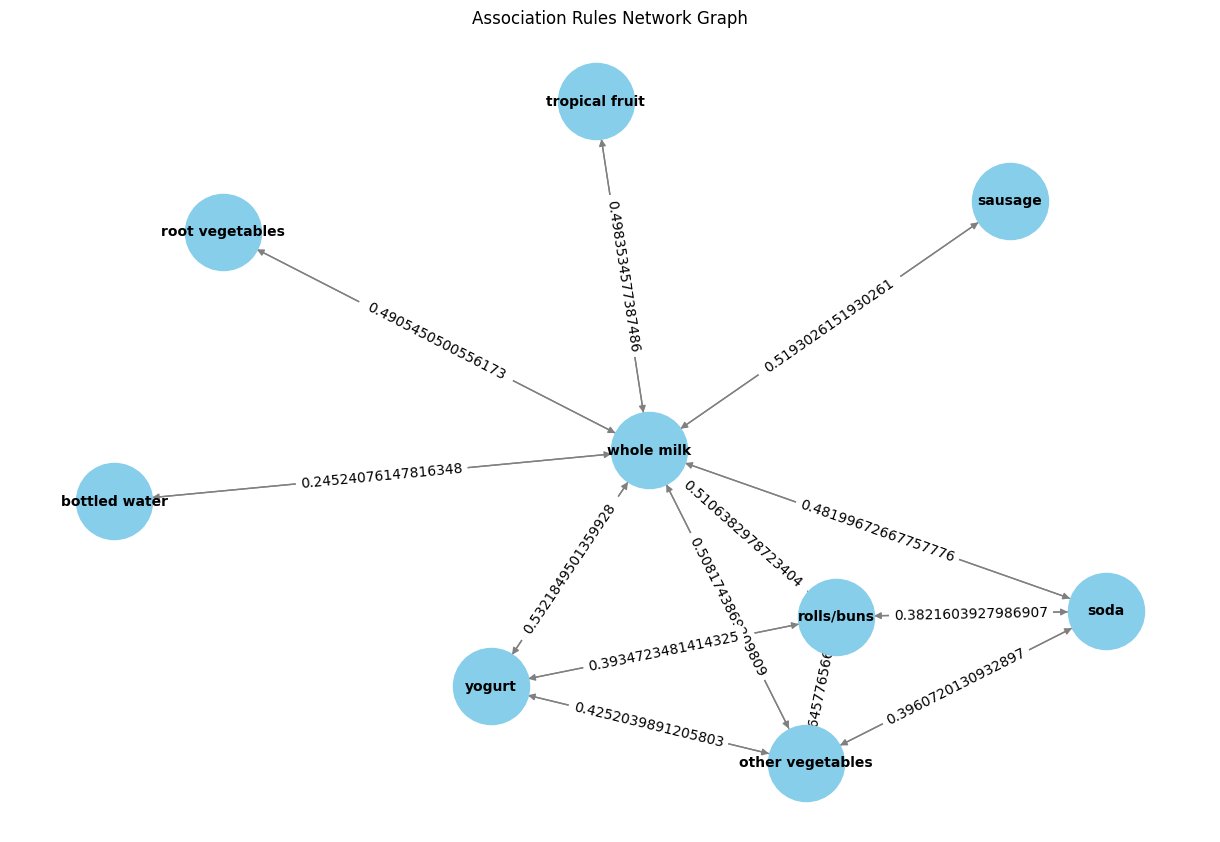

In [96]:
G = nx.DiGraph()

for _, row in rules_df.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['confidence'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)  
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_weight='bold', edge_color='gray')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Association Rules Network Graph")
plt.show()

In [97]:
# deployment
with open('model.pkl', 'wb') as f:
    pickle.dump(rules, f)